In [7]:
import pandas as pd
import numpy as np

In [8]:
ratings = pd.read_csv("E:/DataScience_2019501123/DADV/assignments/data/title.ratings.tsv", delimiter = '\t')

In [9]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1702
1,tt0000002,6.1,210
2,tt0000003,6.5,1458
3,tt0000004,6.2,123
4,tt0000005,6.2,2260


In [10]:
basics_movie = pd.read_csv("E:/DataScience_2019501123/DADV/assignments/data/title.basic.tsv", delimiter = '\t')

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
basics_movie.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [12]:
basics_movie['startYear'] = pd.to_numeric(basics_movie['startYear'], errors='coerce')

In [13]:
basics_movie.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [14]:
year = basics_movie[(basics_movie.startYear >= 2000) & (basics_movie.startYear <= 2009)]
year

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15181,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N
18034,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short"
33808,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001.0,\N,20,Short
34808,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
35548,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure"
...,...,...,...,...,...,...,...,...,...
7903222,tt9916794,tvEpisode,Episode #2.33,Episode #2.33,0,2009.0,\N,\N,"Action,Drama,Family"
7903223,tt9916796,tvEpisode,Episode #2.34,Episode #2.34,0,2009.0,\N,\N,"Action,Drama,Family"
7903224,tt9916798,tvEpisode,Episode #2.36,Episode #2.36,0,2009.0,\N,\N,"Action,Drama,Family"
7903225,tt9916800,tvEpisode,Episode #2.35,Episode #2.35,0,2009.0,\N,\N,"Action,Drama,Family"


In [15]:
year_rating_merged = pd.merge(year, ratings, on='tconst')
year_rating_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
1,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short",6.6,31
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,79778
3,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure",7.2,82
4,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",6.9,188


In [16]:
only_movies = year_rating_merged.loc[year_rating_merged['titleType'] == 'movie']
only_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,79778
3,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure",7.2,82
4,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",6.9,188
6,tt0079644,movie,November 1828,November 1828,0,2001.0,\N,140,"Drama,War",7.2,30
...,...,...,...,...,...,...,...,...,...,...,...
256156,tt9815124,movie,Mami Jarum,Mami Jarum,0,2002.0,\N,95,Comedy,5.1,22
256203,tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002.0,\N,57,Sci-Fi,4.6,7
256204,tt9876412,movie,Star Trek: The Final Darkness,Star Trek: The Final Darkness,0,2004.0,\N,85,Sci-Fi,4.4,5
256219,tt9881364,movie,Gaja,Gaja,0,2008.0,\N,\N,"Action,Comedy,Romance",7.6,40


In [17]:
popular_movie = only_movies.sort_values('numVotes', ascending = False)

In [18]:
print(popular_movie.head(10)['averageRating'].mean())

8.580000000000002


In [19]:
votes = ratings[ratings['numVotes'] > 1000]
votes

,tconst,averageRating,numVotes
0,tt0000001,5.7,1702
2,tt0000003,6.5,1458
4,tt0000005,6.2,2260
7,tt0000008,5.5,1874
9,tt0000010,6.9,6323
...,...,...,...
1151409,tt9913050,8.3,1201
1151510,tt9913754,7.2,1011
1151527,tt9914552,9.0,1010
1151583,tt9916270,5.7,1047


In [20]:
votes_merged = pd.merge(votes, basics_movie, on = 'tconst')

In [21]:
year = votes_merged[(votes_merged['startYear'] >= 1900) & (votes_merged['startYear'] < 2000)]

In [22]:
year_output = year.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()

In [23]:
flag = 0
final_yr = 0
for i in range(1, len(year_output)):
    a = year_output.loc[i, 'avgR']
    b = year_output.loc[i-1, 'avgR']
    temp = abs(a - b)
    if temp > flag:
        flag = temp
        final_yr = year_output.loc[[i], ['startYear']]
final_yr

,startYear
3,1903.0


In [24]:
rating_merged = pd.merge(ratings, basics_movie, on = 'tconst')
rating_merged

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1702,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,6.1,210,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short"
2,tt0000003,6.5,1458,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.2,123,short,Un bon bock,Un bon bock,0,1892.0,\N,12,"Animation,Short"
4,tt0000005,6.2,2260,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1151598,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012.0,\N,10,"Animation,Comedy,Family"
1151599,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012.0,\N,10,"Animation,Comedy,Family"
1151600,tt9916720,6.4,80,short,The Nun 2,The Nun 2,0,2019.0,\N,10,"Comedy,Horror,Mystery"
1151601,tt9916766,6.9,16,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,\N,43,"Family,Reality-TV"


In [25]:
vote = rating_merged[rating_merged['numVotes']>= 1000]
vote

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1702,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
2,tt0000003,6.5,1458,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
4,tt0000005,6.2,2260,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
7,tt0000008,5.5,1874,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short"
9,tt0000010,6.9,6323,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1151409,tt9913050,8.3,1201,tvEpisode,"The Boar Bares Its Fangs, Zenitsu Sleeps","The Boar Bares Its Fangs, Zenitsu Sleeps",0,2019.0,\N,24,"Action,Animation,Fantasy"
1151510,tt9913754,7.2,1011,tvEpisode,Psalm 46:5,Psalm 46:5,0,2020.0,\N,50,"Action,Drama,Fantasy"
1151527,tt9914552,9.0,1010,short,The Curtain,The Curtain,0,2019.0,\N,\N,"Mystery,Short"
1151583,tt9916270,5.7,1047,movie,Il talento del calabrone,Il talento del calabrone,0,2020.0,\N,84,Thriller


In [26]:
vote_output = vote.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()

In [27]:
vote_output

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
131,2017.0,7.191322
132,2018.0,7.142186
133,2019.0,7.206905
134,2020.0,7.140107


In [28]:
vote_output = vote_output[vote_output.startYear != 2013]
vote_output

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
131,2017.0,7.191322
132,2018.0,7.142186
133,2019.0,7.206905
134,2020.0,7.140107


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
x_train = vote_output['startYear'].values.reshape(-1,1)
y_train = vote_output['avgR'].values.reshape(-1,1)

In [31]:
model = LinearRegression().fit(x_train,y_train)

In [32]:
xtest = np.array([2013]).reshape(-1,1)
prediction = model.predict(xtest)
print(prediction)

[[7.0136479]]


In [33]:
# To visualize
import matplotlib.pyplot as plt

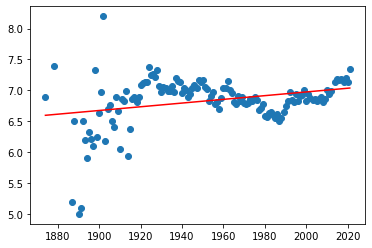

In [34]:
temp_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, temp_pred, color='red')
plt.show()

In [35]:
corrl_year = basics_movie[(basics_movie['startYear']>= 1900) & (basics_movie['startYear'] < 2000)]

In [36]:
corrl_Data = pd.merge(ratings, corrl_year, on='tconst')
corrl_Data

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000160,5.4,11,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900.0,\N,\N,"Drama,Short"
1,tt0000265,4.3,103,short,Above the Limit,Above the Limit,0,1900.0,\N,\N,"Comedy,Short"
2,tt0000269,4.9,100,short,"Army Life; or, How Soldiers Are Made: Mounted ...",Army Life,0,1900.0,\N,\N,"Documentary,Short"
3,tt0000271,6.2,8,short,Arrivée de Pierette et Pierrot,Arrivée de Pierette et Pierrot,0,1900.0,\N,\N,Short
4,tt0000272,5.6,710,short,As Seen Through a Telescope,As Seen Through a Telescope,0,1900.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
370620,tt9909866,4.3,10,video,Nora,Nora,0,1985.0,\N,45,"Action,Adventure,Animation"
370621,tt9914702,7.2,15,tvEpisode,Episode dated 5 February 1988,Episode dated 5 February 1988,0,1988.0,\N,\N,\N
370622,tt9915498,5.8,6,video,R. Kelly: If I Could Turn Back the Hands of Time,R. Kelly: If I Could Turn Back the Hands of Time,0,1999.0,\N,\N,"Music,Short"
370623,tt9915946,6.2,6,movie,Nuestra película,Nuestra película,0,1993.0,\N,96,Documentary


In [37]:
years = list(corrl_Data['startYear'].unique())
correlation_year = pd.DataFrame()
for year in years:
    X=corrl_Data[corrl_Data['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    correlation_year = correlation_year.append(newRow, ignore_index=True)
correlation_year = correlation_year.reindex(columns=['Year', 'Correlation'])
correlation_year

,Year,Correlation
0,1900.0,0.232215
1,1901.0,0.262765
2,1902.0,0.206988
3,1903.0,0.167379
4,1904.0,0.277191
...,...,...
95,1997.0,0.021080
96,1999.0,0.028864
97,1998.0,0.021968
98,1994.0,0.033998


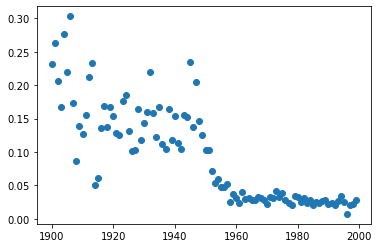

In [38]:
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(correlation_year['Year'],correlation_year['Correlation'])

<BarContainer object of 100 artists>

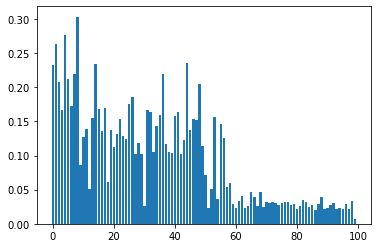

In [39]:
plt.bar(np.arange(len(correlation_year['Year'])), correlation_year['Correlation'])